# Practical - 1 (Linear Regression)

In [1]:
## IMPORT ALL THE REQUIRED LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## 1. Data gathering and Pre-processing

In [2]:
## Reading the data

df = pd.read_csv("beam_data_1.csv")
df.head()

,Elastic_Modulus (GPa),Load (kN),Length_of_Beam (m),X-sectional Width b (mm),X-sectional Height h (mm),Max Deflection (mm)
0,151,2,11,58,95,88.62827
1,158,3,7,61,88,39.16701
2,158,4,5,36,91,29.16260
3,141,1,15,31,84,325.68300
4,177,4,13,62,106,168.09220


### 1.1 Function for data_preprocessing

In [3]:
## Function for loading the data and train test split

'''
--> Enter the name of the file as a string for the variable -- "csv_file" 
--> Enter the name of the "target variable" as a string for the variable -- "target_variable"
--> train_size , test_size -- The ratio you want to split the data (80 ,20)

'''

def data_preprocessing(csv_file,train_size,test_size,The_target_variable):
    
    # load the data using pandas
    
    df = pd.read_csv(csv_file)
    
    print(f"The shape of your dataset is : {df.shape}")
    
    total_no_of_rows = df.shape[0]
    total_no_of_columns = df.shape[1]
    
    # The input features(dependent features) & The target variable(independent feature)
    
    X = df.drop(The_target_variable,axis = 1)
    y = df[[The_target_variable]]
    
    # Train_test_split
    
    no_of_rows_for_training = total_no_of_rows*(train_size/100)
    no_of_rows_for_testing = total_no_of_rows*(test_size/100)
    
    train_X = X.iloc[0:int(no_of_rows_for_training),:] 
    test_X = X.iloc[int(no_of_rows_for_training):total_no_of_rows,:]
 
    train_y = y.iloc[1:int(no_of_rows_for_training),:]
    test_y = y.iloc[int(no_of_rows_for_training):total_no_of_rows,:]
    
    print(f"The shape of your traing data set is: {train_X.shape}")
    print(f"The shape of your testing data set is : {test_X.shape}")
    
    ## Convert the pandas dataframe to to Numpy array to do model building
    
    train_X_arr = train_X.to_numpy()
    train_y_arr = train_y.to_numpy()
    test_X_arr = test_X.to_numpy()
    test_y_arr = test_y.to_numpy()
    
    print("your dataframe has been splitted to a traing and testing dataset as well as it has been converted to numpy array for furthe preprocessing")
    
    return train_X_arr, train_y_arr, test_X_arr, test_y_arr
    

In [4]:
## Doing a train test split in 80:20 ratio

train_X_arr, train_y_arr, test_X_arr, test_y_arr = data_preprocessing("beam_data_1.csv",80,20,"Max Deflection (mm)")

The shape of your dataset is : (10000, 6)
The shape of your traing data set is: (8000, 5)
The shape of your testing data set is : (2000, 5)
your dataframe has been splitted to a traing and testing dataset as well as it has been converted to numpy array for furthe preprocessing


## 2. Implementing Linear Regression

### 2.1 Using the basis function -- phi(x) = x (y = w0 + w1x1 + w2x2 +......+ wpxp)

In [5]:
'''
---> Computing the least square loss

'''

def computing_cost_fn(feature_matrix, target_var, weight_matrix):
    
    ones_column = np.ones((feature_matrix.shape[0], 1))
    X = np.hstack((ones_column, feature_matrix))
    y = target_var

    no_of_samples = X.shape[0]
    
    summation = 0.0;
    
    
    for x,y in zip(X, y):
        y_hat = np.dot(x,weight_matrix)
        summation += (y_hat - y) ** 2
        
    final_cost = summation / (no_of_samples * 2.0)

    return final_cost[0]

In [6]:
## Intialise the weights 

weights = np.ones(train_X_arr.shape[1] + 1,).reshape(1,-1).T * 0.6

In [7]:
## Intial weight matrix
weights  

array([[0.6],
       [0.6],
       [0.6],
       [0.6],
       [0.6],
       [0.6]])

In [8]:
## Compute the cost using the Intial weight matrix
computing_cost_fn(train_X_arr,train_y_arr,weights)

22626.726879837308

In [9]:
## Implementing the " GRADIENT DESCENT ALGORITHM "

'''
The function is taking [feature_matrix (inputs) , target_var, weight_matrix (Intial weight matrix) ,learning_rate, 
max_iter (Maximum Iteration)] as inputs and outputting the updated weight matrix and a matrix containing costs in each iteration.

'''

def gradient_descent(feature_matrix, target_var, weight_matrix,learning_rate,max_iter):
    
    iteration = 0
    
    cost = np.zeros(((max_iter),1))
    
    ones_column = np.ones((feature_matrix.shape[0], 1))
    
    X = np.hstack((ones_column, feature_matrix))
    
    no_of_samples = X.shape[0]
    
    
    while iteration < max_iter:
        
        gradient = np.zeros((X.shape[1],)).reshape(1,-1).T
        
        cost[iteration] = computing_cost_fn(feature_matrix, target_var, weight_matrix)
        
        for x,y in zip(X, target_var):
            
            y_hat = np.dot(x,weight_matrix)
            
            gradient = gradient + ((y_hat[0] - y[0]) * x.reshape(1,-1).T)  # gradient calculation
            
        
               
        weight_matrix -= (learning_rate * (gradient)/no_of_samples) # updation of weight matrix
        
        
        if iteration > 0 and np.abs(cost[iteration - 1] - cost[iteration]) < 1e-4:
            
            print("cost convergence")
            
            break
            
        
        iteration = iteration + 1
        
        
    return cost , weight_matrix 


In [10]:
gradient_descent(train_X_arr,train_y_arr,weights,0.00001,100)

(array([[22626.72687984],
        [22605.83839078],
        [22596.49859709],
        [22592.06429268],
        [22589.71541347],
        [22588.25482059],
        [22587.17430757],
        [22586.25812014],
        [22585.41465022],
        [22584.60498999],
        [22583.81260299],
        [22583.03044964],
        [22582.25552183],
        [22581.48652302],
        [22580.72288333],
        [22579.9643415 ],
        [22579.21076742],
        [22578.46208674],
        [22577.71824899],
        [22576.9792139 ],
        [22576.24494569],
        [22575.51541062],
        [22574.79057594],
        [22574.07040943],
        [22573.35487926],
        [22572.64395385],
        [22571.93760188],
        [22571.23579226],
        [22570.53849411],
        [22569.84567678],
        [22569.15730981],
        [22568.47336298],
        [22567.79380626],
        [22567.11860984],
        [22566.44774411],
        [22565.78117966],
        [22565.1188873 ],
        [22564.46083803],
        [225

In [32]:
'''
Implementing the Linear regression function using the gradient descent algorithm and predecting the y values using the test data

'''
def linear_Regression(testing_features,testing_target_var,feature_matrix, target_var, weight_matrix,learning_rate,max_iter):
    
    ## compute the optimum weights using gradient_descent algorithm
    
    cost_matrix , updated_weight_matrix = gradient_descent(feature_matrix, target_var, weight_matrix,learning_rate,max_iter)
    
    
    ones_column = np.ones((testing_features.shape[0], 1))
    
    X_test = np.hstack((ones_column, testing_features))
    
    no_of_samples = X_test.shape[0]
    
    y_test = testing_target_var
    
    
    i = 0
    
    y_pred = np.dot(X_test,updated_weight_matrix)
        
    return y_pred

In [36]:
## predicting the y_values
y_pred = linear_Regression(test_X_arr,test_y_arr,train_X_arr,train_y_arr, weights,0.00001,5000)

In [37]:
## predicted values
y_pred

array([[186.64058197],
       [181.81494921],
       [192.60483943],
       ...,
       [185.55131277],
       [196.9189589 ],
       [174.86757053]])

In [38]:
## Actual values
test_y_arr

array([[250.87712  ],
       [ 69.917015 ],
       [  7.7740765],
       ...,
       [127.56236  ],
       [169.53879  ],
       [218.56023  ]])

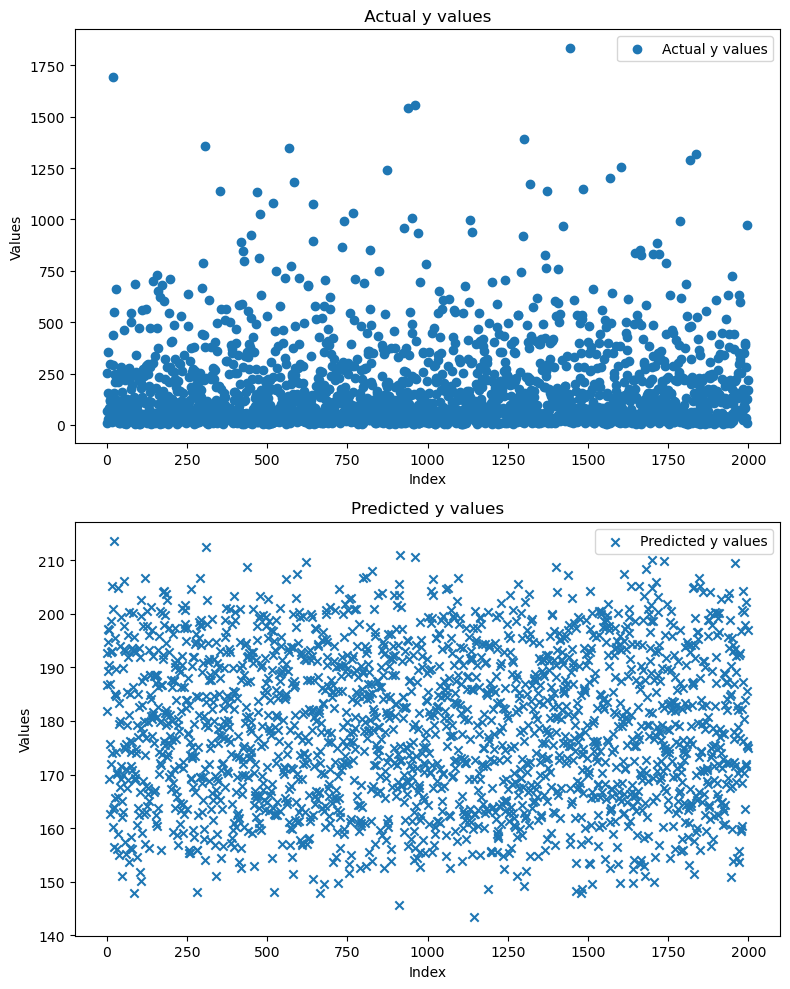

In [65]:
# Creating two subplots
plt.figure(figsize=(8, 10))

plt.subplot(2, 1, 1)
plt.scatter(range(len(test_y_arr)), test_y_arr, label='Actual y values', marker='o')
plt.xlabel('Index')
plt.ylabel('Values')
plt.title(' Actual y values ')
plt.legend()

plt.subplot(2, 1, 2)
plt.scatter(range(len(y_pred)), y_pred, label='Predicted y values', marker='x')
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Predicted y values')
plt.legend()

# Adjust layout for better spacing
plt.tight_layout()

# Display the plots
plt.show()

### 2.1.1 Ridge Regression

In [39]:
## Compute the cost function

def computing_cost_fn_ridge(feature_matrix, target_var, weight_matrix):
    
    ones_column = np.ones((feature_matrix.shape[0], 1))
    X = np.hstack((ones_column, feature_matrix))
    y = target_var

    no_of_samples = X.shape[0]
    no_of_columns = X.shape[1]
    
    summation = 0.0
    
    weight_sum = 0.0
    
    
    for x,y in zip(X, y):
        y_hat = np.dot(x,weight_matrix)
        summation += (y_hat - y) ** 2
        
    for w in weights:
        weight_sum += w ** 2
        
        
    final_cost = (summation / (no_of_samples * 2.0)) + (weight_sum / no_of_columns)

    return final_cost[0]

In [40]:
## Compute the cost using The Intial weight matrix
computing_cost_fn_ridge(train_X_arr, train_y_arr, weights)

22446.63595306217

In [41]:
## Gradient descent algorithm with Ridge regression

def gradient_descent_ridge(feature_matrix, target_var, weight_matrix,learning_rate,max_iter):
    
    iteration = 0
    
    cost = np.zeros(((max_iter),1))
    
    ones_column = np.ones((feature_matrix.shape[0], 1))
    
    X = np.hstack((ones_column, feature_matrix))
    
    no_of_samples = X.shape[0]
    
    no_of_columns = X.shape[1]
    
    
    while iteration < max_iter:
        
        gradient = np.zeros((X.shape[1],)).reshape(1,-1).T
        
        cost[iteration] = computing_cost_fn_ridge(feature_matrix, target_var, weight_matrix)
        
        for x,y in zip(X, target_var):
            
            y_hat = np.dot(x,weight_matrix)
            
            gradient = gradient + ((y_hat[0] - y[0]) * x.reshape(1,-1).T)  # gradient calculation
            
        
            
        weight_sum = 0.0
        
        for w in weights:
            
            weight_sum += w 
            
               
        weight_matrix -= (learning_rate * ((gradient /no_of_samples) + ((weight_sum)/(2.0*no_of_columns)) ))  # updation of weight matrix
        

        
        if iteration > 0 and np.abs(cost[iteration - 1] - cost[iteration]) < 1e-5:
            
            print("cost convergence")
            
            break
            
        
        iteration = iteration + 1
        
        
    return cost , weight_matrix 

In [42]:
gradient_descent_ridge(train_X_arr,train_y_arr,weights,0.00001,100)

(array([[22446.63595306],
        [22446.63574235],
        [22446.63553276],
        [22446.63532356],
        [22446.63511447],
        [22446.6349054 ],
        [22446.63469633],
        [22446.63448728],
        [22446.63427824],
        [22446.63406922],
        [22446.63386024],
        [22446.6336513 ],
        [22446.63344239],
        [22446.63323354],
        [22446.63302472],
        [22446.63281596],
        [22446.63260724],
        [22446.63239856],
        [22446.63218994],
        [22446.63198136],
        [22446.63177283],
        [22446.63156435],
        [22446.63135592],
        [22446.63114753],
        [22446.6309392 ],
        [22446.63073091],
        [22446.63052267],
        [22446.63031447],
        [22446.63010633],
        [22446.62989823],
        [22446.62969018],
        [22446.62948218],
        [22446.62927422],
        [22446.62906632],
        [22446.62885846],
        [22446.62865065],
        [22446.62844288],
        [22446.62823517],
        [224

In [98]:
def linear_Ridge_Regression(testing_features,testing_target_var,feature_matrix, target_var, weight_matrix,learning_rate,max_iter):
    
    ## compute the optimum weights using gradient_descent algorithm
    
    cost_matrix , updated_weight_matrix = gradient_descent_ridge(feature_matrix, target_var, weight_matrix,learning_rate,max_iter)
    
    
    ones_column = np.ones((testing_features.shape[0], 1))
    
    X_test = np.hstack((ones_column, testing_features))
    
    no_of_samples = X_test.shape[0]
    
    y_test = testing_target_var
    
    
    i = 0
    
    y_pred = np.dot(X_test,updated_weight_matrix)
        
    return y_pred

In [99]:
## predicting y values
y_pred_ridge = linear_Ridge_Regression(test_X_arr,test_y_arr,train_X_arr,train_y_arr, weights,0.00001,1000)

In [100]:
## Predicted y values
y_pred_ridge

array([[187.35244333],
       [181.66273928],
       [191.72507377],
       ...,
       [185.92671095],
       [197.10332098],
       [174.99791157]])

In [101]:
## Actual values
test_y_arr

array([[250.87712  ],
       [ 69.917015 ],
       [  7.7740765],
       ...,
       [127.56236  ],
       [169.53879  ],
       [218.56023  ]])

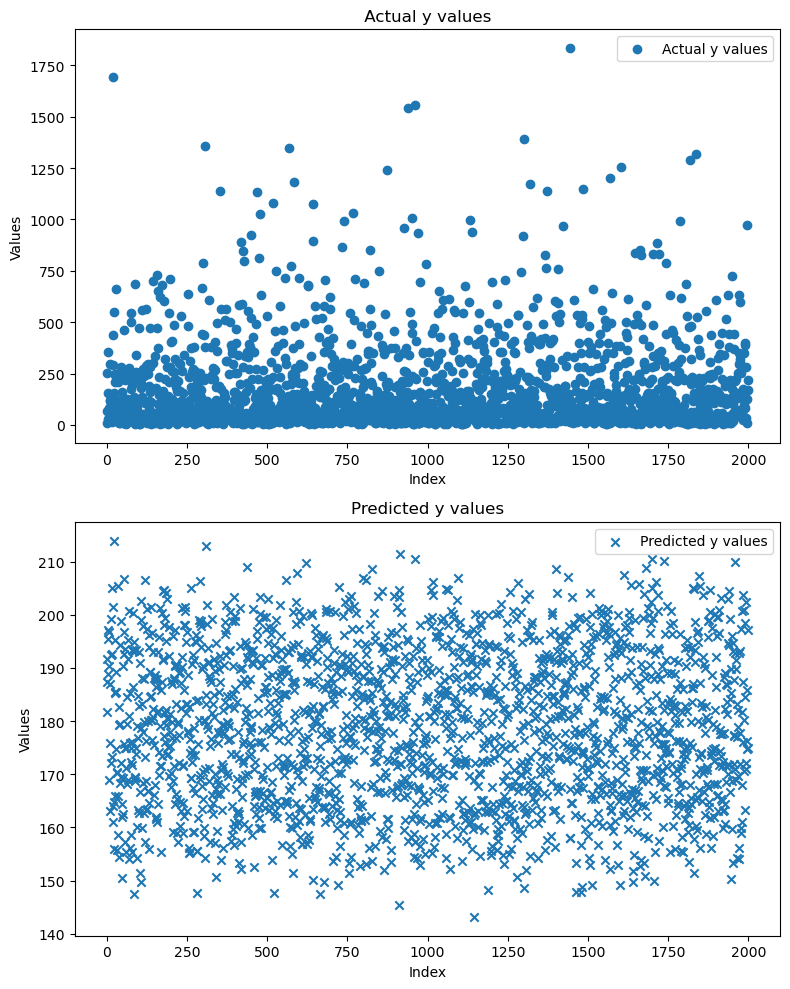

In [102]:
# Creating two subplots
plt.figure(figsize=(8, 10))

plt.subplot(2, 1, 1)
plt.scatter(range(len(test_y_arr)), test_y_arr, label='Actual y values', marker='o')
plt.xlabel('Index')
plt.ylabel('Values')
plt.title(' Actual y values ')
plt.legend()

plt.subplot(2, 1, 2)
plt.scatter(range(len(y_pred_ridge)), y_pred_ridge, label='Predicted y values', marker='x')
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Predicted y values')
plt.legend()

# Adjust layout for better spacing
plt.tight_layout()

# Display the plots
plt.show()

### 2.1.2 Lasso Regression

In [68]:
def computing_cost_fn_lasso(feature_matrix, target_var, weight_matrix):
    
    ones_column = np.ones((feature_matrix.shape[0], 1))
    X = np.hstack((ones_column, feature_matrix))
    y = target_var

    no_of_samples = X.shape[0]
    no_of_columns = X.shape[1]
    
    summation = 0.0
    
    weight_sum = 0.0
    
    
    for x,y in zip(X, y):
        y_hat = np.dot(x,weight_matrix)
        summation += (y_hat - y) ** 2
        
    for w in weights:
        weight_sum += abs(w)
        
        
    final_cost = (summation / (no_of_samples * 2.0)) + (weight_sum / no_of_columns)

    return final_cost[0]

In [69]:
computing_cost_fn_lasso(train_X_arr, train_y_arr, weights)

22446.39535483562

In [70]:
def gradient_descent_lasso(feature_matrix, target_var, weight_matrix,learning_rate,max_iter):
    
    iteration = 0
    
    cost = np.zeros(((max_iter),1))
    
    ones_column = np.ones((feature_matrix.shape[0], 1))
    
    X = np.hstack((ones_column, feature_matrix))
    
    no_of_samples = X.shape[0]
    
    no_of_columns = X.shape[1]
    
    
    while iteration < max_iter:
        
        gradient = np.zeros((X.shape[1],)).reshape(1,-1).T
        
        cost[iteration] = computing_cost_fn_lasso(feature_matrix, target_var, weight_matrix)
        
        for x,y in zip(X, target_var):
            
            y_hat = np.dot(x,weight_matrix)
            
            gradient = gradient + ((y_hat[0] - y[0]) * x.reshape(1,-1).T)  # gradient calculation
            
        
            
        weight_sum = 0.0
        
        for w in weights:
            
            weight_sum += w/abs(w) 
            
               
        weight_matrix -= (learning_rate * ((gradient /no_of_samples) + ((weight_sum[0])/no_of_columns) ))  # updation of weight matrix
        

        
        if iteration > 0 and np.abs(cost[iteration - 1] - cost[iteration]) < 1e-5:
            
            print("cost convergence")
            
            break
            
        
        iteration = iteration + 1
        
        
    return cost , weight_matrix 

In [71]:
# gradient_descent_lasso(train_X_arr,train_y_arr,weights,0.00001,10)

In [79]:
def linear_Lasso_Regression(testing_features,testing_target_var,feature_matrix, target_var, weight_matrix,learning_rate,max_iter):
    
    ## compute the optimum weights using gradient_descent algorithm
    
    cost_matrix , updated_weight_matrix = gradient_descent_lasso(feature_matrix, target_var, weight_matrix,learning_rate,max_iter)
    
    
    ones_column = np.ones((testing_features.shape[0], 1))
    
    X_test = np.hstack((ones_column, testing_features))
    
    no_of_samples = X_test.shape[0]
    
    y_test = testing_target_var
    
    
    i = 0
    
    y_pred = np.dot(X_test,updated_weight_matrix)
        
    return y_pred

In [81]:
## predicting y values
y_pred_lasso = linear_Lasso_Regression(test_X_arr,test_y_arr,train_X_arr,train_y_arr, weights,0.00001,1000)

In [94]:
## Predicted y values
y_pred_lasso

array([[187.17915264],
       [181.6641627 ],
       [191.94586371],
       ...,
       [185.85698595],
       [197.03138555],
       [174.95602581]])

In [95]:
## Actual values
test_y_arr

array([[250.87712  ],
       [ 69.917015 ],
       [  7.7740765],
       ...,
       [127.56236  ],
       [169.53879  ],
       [218.56023  ]])

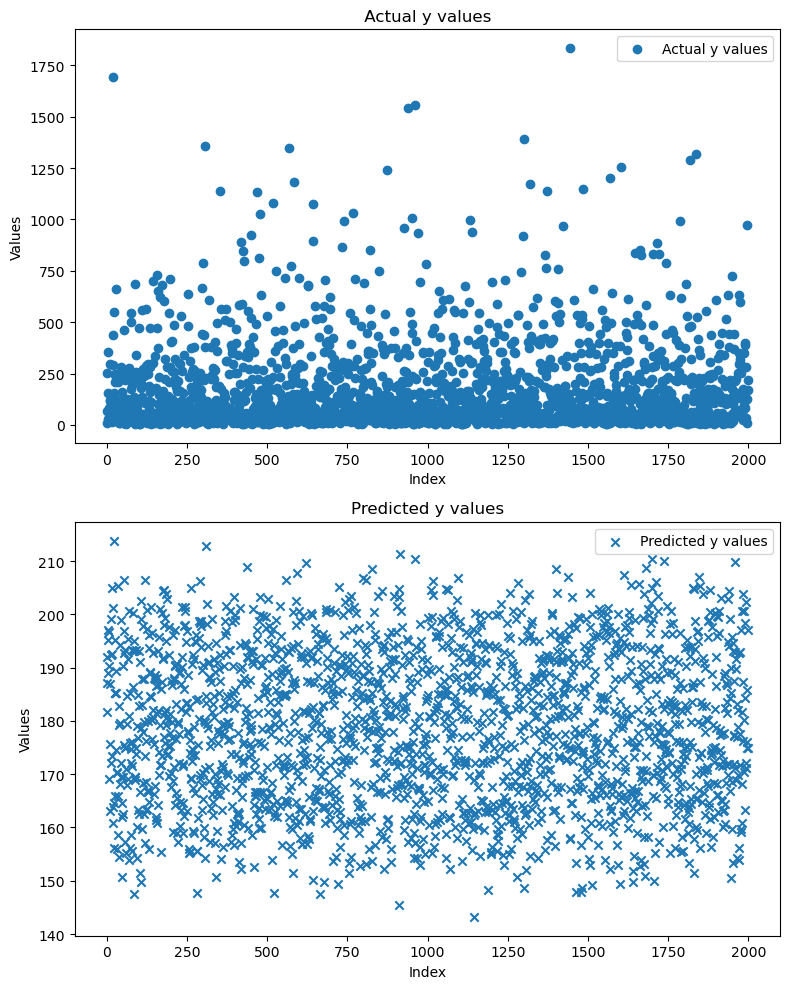

In [96]:
# Creating two subplots
plt.figure(figsize=(8, 10))

plt.subplot(2, 1, 1)
plt.scatter(range(len(test_y_arr)), test_y_arr, label='Actual y values', marker='o')
plt.xlabel('Index')
plt.ylabel('Values')
plt.title(' Actual y values ')
plt.legend()

plt.subplot(2, 1, 2)
plt.scatter(range(len(y_pred_lasso)), y_pred_lasso, label='Predicted y values', marker='x')
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Predicted y values')
plt.legend()

# Adjust layout for better spacing
plt.tight_layout()

# Display the plots
plt.show()

### 2.2 Using the basis function -- phi(x) = x^p (y = w0 + w1x1 + w2x2^2 + w3x3^3......+ wpxp^p)

In [127]:
## Function for converting the input vector --- [1,x1,x2^2,x3^3,.............xp^p]

def convert_input_poly(X):
    
    no_of_samples = X.shape[0]
    
    no_of_columns = X.shape[1]
    
    pre_final_matrix = np.ones((no_of_columns,no_of_samples))
    
    d = 1
    
    for x in X.T:
        
        pre_final_matrix[d,:] =  np.power(x,d).reshape(1,-1)
        
        d = d + 1
        
    final_matrix = pre_final_matrix.T
    
    return final_matrix
        
    
    

In [128]:
train_X_arr

array([[151,   2,  11,  58,  95],
       [158,   3,   7,  61,  88],
       [158,   4,   5,  36,  91],
       ...,
       [170,   1,  14,  57,  89],
       [170,   3,   6,  55, 108],
       [145,   2,  11,  49,  86]], dtype=int64)

In [129]:
up = convert_input_poly(train_X_arr)
up

IndexError: index 5 is out of bounds for axis 0 with size 5

In [117]:
weights1 = np.ones(train_X_arr.shape[1] + 1,).reshape(1,-1).T * 0
weights1

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [119]:
def computing_cost_fn_poly(feature_matrix, target_var, weight_matrix):
    
    ones_column = np.ones((feature_matrix.shape[0], 1))
    X_in = np.hstack((ones_column, feature_matrix))
    y = target_var
    
    X = convert_input_poly(X_in)

    no_of_samples = X.shape[0]
    
    summation = 0.0;
    
    
    for x,y in zip(X, y):
        y_hat = np.dot(x,weight_matrix)
        summation += (y_hat - y) ** 2
        
    final_cost = summation / (no_of_samples * 2.0)

    return final_cost[0]

In [120]:
computing_cost_fn_poly(train_X_arr, train_y_arr, weights1)

38580.51423857905

In [121]:
def gradient_descent_poly(feature_matrix, target_var, weight_matrix,learning_rate,max_iter):
    
    iteration = 0
    
    cost = np.zeros(((max_iter),1))
    
    ones_column = np.ones((feature_matrix.shape[0], 1))
    
#     X_in = np.hstack((ones_column, feature_matrix))
    
    X = convert_input_poly(feature_matrix)
    
    no_of_samples = X.shape[0]
    
    
    while iteration < max_iter:
        
        gradient = np.zeros((X.shape[1],)).reshape(1,-1).T
        
        cost[iteration] = computing_cost_fn_poly(feature_matrix, target_var, weight_matrix)
        
        for x,y in zip(X, target_var):
            
            y_hat = np.dot(x,weight_matrix)
            
            gradient = gradient + ((y_hat[0] - y[0]) * x.reshape(1,-1).T)  # gradient calculation
            
        
               
        weight_matrix -= (learning_rate * (gradient)/no_of_samples) # updation of weight matrix
        
        if iteration > 0 and np.abs(cost[iteration - 1] - cost[iteration]) < 1e-4:
            
            print("cost convergence")
            
            break
        
        iteration = iteration + 1
        
        
    return cost , weight_matrix 

In [122]:
gradient_descent_poly(train_X_arr, train_y_arr, weights1,1e-20,1000)

ValueError: shapes (5,) and (6,1) not aligned: 5 (dim 0) != 6 (dim 0)

In [111]:
def linear_Regression_poly(testing_features,testing_target_var,feature_matrix, target_var, weight_matrix,learning_rate,max_iter):
    
    ## compute the optimum weights using gradient_descent algorithm
    
    cost_matrix , updated_weight_matrix = gradient_descent_poly(feature_matrix, target_var, weight_matrix,learning_rate,max_iter)
    
    
    ones_column = np.ones((testing_features.shape[0], 1))
    
    X_test = np.hstack((ones_column, testing_features))
    
    no_of_samples = X_test.shape[0]
    
    y_test = testing_target_var
    
    
    i = 0
    
    y_pred = np.dot(X_test,updated_weight_matrix)
        
    return y_pred

In [112]:
## predicting y values
y_pred_poly = linear_Regression_poly(test_X_arr,test_y_arr,train_X_arr,train_y_arr, weights,1e-20,1000)

In [113]:
## Predicted y values
y_pred_poly

array([[nan],
       [nan],
       [nan],
       ...,
       [nan],
       [nan],
       [nan]])

In [108]:
## Actual values
test_y_arr

array([[250.87712  ],
       [ 69.917015 ],
       [  7.7740765],
       ...,
       [127.56236  ],
       [169.53879  ],
       [218.56023  ]])

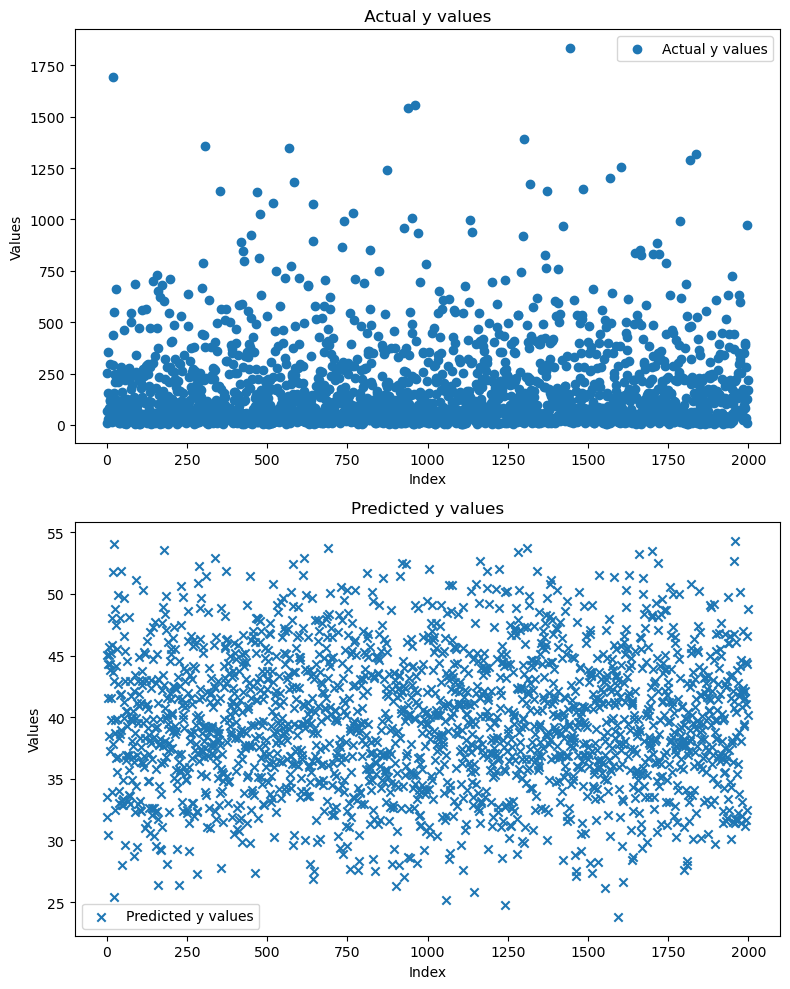

In [109]:
# Creating two subplots
plt.figure(figsize=(8, 10))

plt.subplot(2, 1, 1)
plt.scatter(range(len(test_y_arr)), test_y_arr, label='Actual y values', marker='o')
plt.xlabel('Index')
plt.ylabel('Values')
plt.title(' Actual y values ')
plt.legend()

plt.subplot(2, 1, 2)
plt.scatter(range(len(y_pred_poly)), y_pred_poly, label='Predicted y values', marker='x')
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Predicted y values')
plt.legend()

# Adjust layout for better spacing
plt.tight_layout()

# Display the plots
plt.show()